In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)

In [5]:
inspector=inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [6]:
# reflect all the tables
columns=inspector.get_columns('measurement')
columns
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [7]:
# reflect all the tables
columns=inspector.get_columns('station')
columns
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [8]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [9]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
measurement=Base.classes.measurement
station=Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
Session=Session(engine)

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
Session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

<Figure size 1000x800 with 0 Axes>

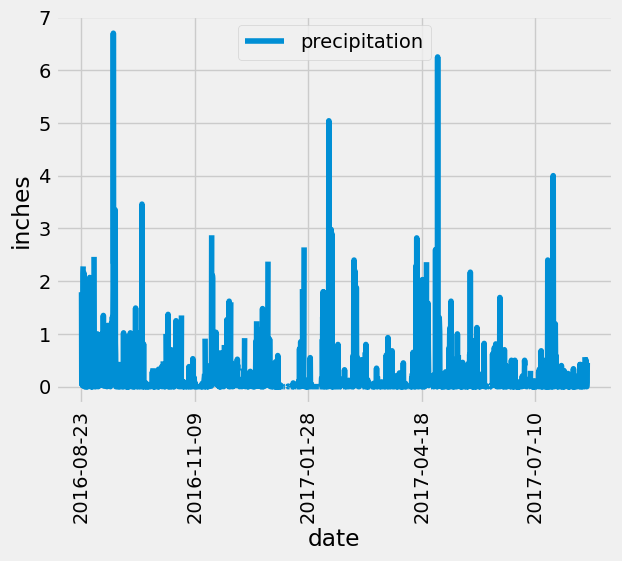

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
Year_ago=dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precip_results=Session.query(measurement.date, measurement.prcp).filter(measurement.date>= Year_ago).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df=pd.DataFrame(precip_results, columns=['date', 'precipitation']).set_index('date')

# Sort the dataframe by date
precip_df=precip_df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10,8))
precip_df.plot()
plt.ylabel('inches')
plt.xticks(rotation=90)
plt.show()


In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number stations in the dataset
Session.query(func.count(station.station)).all()

[(9,)]

In [16]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station=Session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = station[0][0]
Session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)).filter(measurement.station == most_active_station).all()

[(54.0, 85.0, 71.66378066378067)]

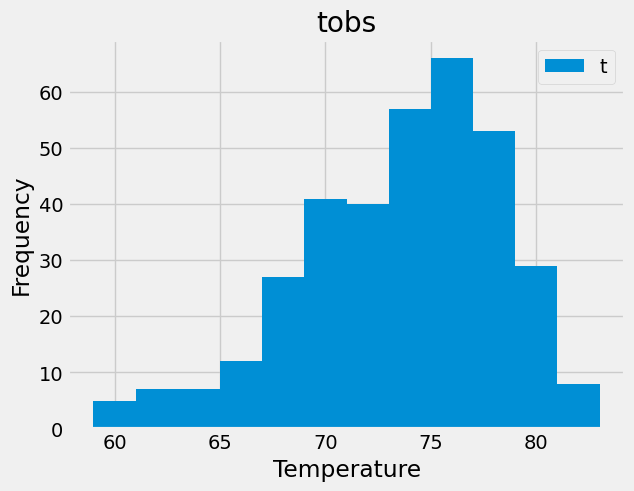

In [19]:
# Using the most active station id
most_active_results=Session.query(measurement.tobs).filter(measurement.date>= Year_ago).filter(measurement.station == most_active_station).all()
most_active_results

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_df=pd.DataFrame(most_active_results, columns=['tobs'])
most_active_df.hist(bins=12)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.legend('tobs')
plt.show()

# Close session

In [21]:
# Close Session
Session.close()